In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import json
import seaborn as sns
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [0]:
with open('gdrive/My Drive/categories.json') as file:
  data = json.load(file)

mobile_data  = {}
for key in data['Mobile'].keys():
  lower_key = key.lower()
  mobile_data[lower_key] = data['Mobile'][key]

{'advan': 45,
 'alcatel': 55,
 'asus': 43,
 'blackberry': 36,
 'brandcode': 39,
 'evercoss': 44,
 'honor': 54,
 'huawei': 47,
 'icherry': 52,
 'infinix': 40,
 'iphone': 31,
 'lenovo': 37,
 'maxtron': 56,
 'mito': 46,
 'motorola': 49,
 'nokia': 38,
 'oppo': 41,
 'others mobile & tablet': 35,
 'realme': 51,
 'samsung': 32,
 'sharp': 48,
 'smartfren': 53,
 'sony': 33,
 'spc': 57,
 'strawberry': 50,
 'vivo': 42,
 'xiaomi': 34}

In [0]:
df = pd.read_csv('gdrive/My Drive/train.csv')
mobile = df[df['image_path'].apply(lambda x: x.startswith('mobile'))]
mobile.head()

(160330, 4)


,itemid,title,Category,image_path
506285,2346660,apple iphone 4s back glass spare part original...,31,mobile_image/a9c8f0fdd6587deed197634066cf7eee.jpg
506286,2816338,iphone 4s 64gb white,31,mobile_image/3b9a11608551b11b9330268e0d055e01.jpg
506287,2847602,samsung sm b310e piton dual sim,32,mobile_image/1d719e936841a83c165da620f927de68.jpg
506288,3116949,samsung caramel gt e1272 dual sim 32 mb putih,32,mobile_image/1d35a74d90df6cf4a02e6a5df9e9ff29.jpg
506289,3794648,garskin sony experia z z1 z2 ultra,33,mobile_image/5556577b09539a9c0db0d00e0f171e2d.jpg


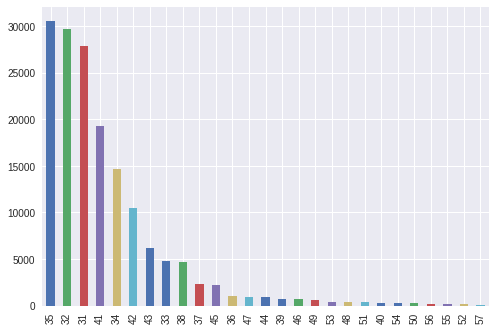

In [0]:
mobile['Category'].value_counts().plot.bar()

In [0]:
# see the most frequent words in data
def top_words(titles):
  word_dict = {}
  for title in titles:
    words = title.split()
    for word in words:
      if word in word_dict:
        word_dict[word] += 1
      else:
        word_dict[word] = 1

  ordered_list = list(sorted(word_dict.items(), key = lambda x: x[1], reverse=True))
  return ordered_list

ordered_mobile = top_words(mobile['title'])

import math
def display_top_words(top_words):
  rows = 10
  cols = math.ceil(len(top_words) / 10.0)
  a = 0
  for row in range(rows):
    words = top_words[row::10]
    for word in words:
      string = word[0] + ': ' + str(word[1])
      print('{: >20}'.format(string), end='\t')
    print('\n')
    
display_top_words(ordered_mobile[:50])

      samsung: 33200	         64gb: 20071	         vivo: 11922	          asus: 7870	          hari: 6524	

        promo: 32830	         beli: 14992	            6: 10916	          16gb: 7784	          chat: 6368	

      garansi: 31128	     original: 14459	        tahun: 10703	             5: 7589	          cuci: 6300	

       iphone: 27436	          new: 14195	         gold: 10543	            gb: 7417	           rom: 6268	

            1: 25020	         plus: 14130	           4gb: 9835	         murah: 7359	        diskon: 6194	

        resmi: 24304	        black: 14032	             4: 9433	             7: 7334	        gudang: 6060	

          ram: 22454	         32gb: 13817	           big: 9423	            mi: 7278	           ini: 6038	

       galaxy: 22329	       gratis: 13283	           pro: 9386	         128gb: 6848	         nokia: 5756	

            2: 21497	           wa: 13143	          note: 8192	       zenfone: 6697	          sony: 5632	

         oppo: 21283	       xiaomi: 1

In [0]:
import re
def find_word(title, word):
  if re.search(r'\b{}\b'.format(word), title):
    return True
  else:
    return False

def find_title_word(data, word):
  data_x = data[data['title'].apply(lambda x: find_word(x, word))]
  return data_x


def change_category(x, word, not_to_change):
   if x['Category'] not in not_to_change and find_word(x['title'], word):
    return mobile_data[word]
   else:
    return x['Category']
    

for word in ['samsung', 'iphone', 'xiaomi', 'oppo', 'vivo']:
  mobile['Category'] = mobile.apply(lambda x: change_category(x, word, [35]), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


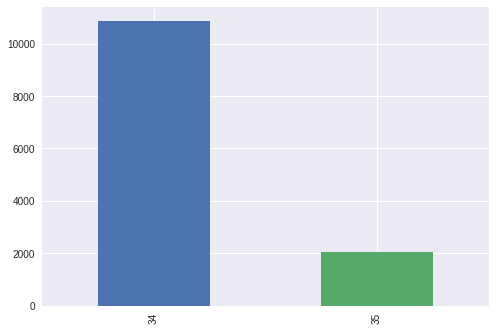

In [0]:
b =  find_title_word(mobile, 'xiaomi')
b['Category'].value_counts().plot.bar()

In [0]:
# b[b['Category'] == 35]

In [0]:
# modify title
import re
def process_title(title, drop_words):
  y = re.sub('[0-9]+(\s)*(gb)', ' ', title)
  
  for word in drop_words:
    y = re.sub(word, ' ', y)
  
  y = re.sub('\s+', ' ', y)
  return y

drop_words = ['black', 'white', 'gold', 'promo']
new_titles = mobile['title'].apply(lambda x: process_title(x, drop_words))

new_top_words = top_words(new_titles)
display_top_words(new_top_words[:50])

      samsung: 33200	     original: 14460	           pro: 9386	         ready: 6604	            4g: 5579	

      garansi: 31132	          new: 14198	             4: 9025	          hari: 6524	        second: 5505	

       iphone: 27437	         plus: 14135	          note: 8192	          chat: 6368	          sale: 5488	

            1: 24950	       gratis: 13283	          asus: 7870	           rom: 6362	         apple: 5187	

        resmi: 24304	           wa: 13143	             3: 7762	          cuci: 6312	             8: 4770	

          ram: 22702	       xiaomi: 12909	             5: 7579	        diskon: 6194	          sein: 4673	

       galaxy: 22329	         vivo: 11922	         murah: 7359	        gudang: 6060	         hitam: 4566	

            2: 21290	        tahun: 10703	             7: 7335	           ini: 6038	          dual: 4490	

         oppo: 21283	            6: 10690	            mi: 7278	         nokia: 5756	            s8: 4458	

         beli: 14992	           big: 

In [0]:
# word vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(ngram_range = (1,3), min_df = 5, max_features = 8000)
cntvt = CountVectorizer(ngram_range = (1,3), min_df = 5, max_features = 8000)

x_tfidf = tfidf.fit_transform(new_titles)
x_cntvt = cntvt.fit_transform(new_titles)
y = mobile['Category'].apply(lambda x: x-31)
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y, test_size = 0.2)
x_train_cntvt, x_test_cntvt, y_train_cntvt, y_test_cntvt = train_test_split(x_cntvt, y, test_size = 0.2)

In [0]:
# neural network model
from keras.models import Sequential
from keras.layers import Dense

model_tfidf = Sequential()
model_tfidf.add(Dense(1000, input_shape=(8000,), activation='relu'))
model_tfidf.add(Dense(150, activation='relu'))
model_tfidf.add(Dense(27, activation='softmax'))
model_tfidf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_tfidf.fit(x_train_tfidf, y_train_tfidf, epochs = 10)

print('NEURAL NETWORK')
print('TF - IDF')
test_tfidf_loss, test_tfidf_acc = model_tfidf.evaluate(x_test_tfidf, y_test_tfidf)
print('Training set accuracy:', test_tfidf_acc)
model_tfidf.save('gdrive/My Drive/mobile_tfidf_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
  2848/128264 [..............................] - ETA: 9:36 - loss: 1.7863 - acc: 0.5341

KeyboardInterrupt: ignored

In [0]:
test_tfidf_loss, test_tfidf_score = model_tfidf.evaluate(x_test_tfidf, y_test_tfidf)
print('loss:', test_tfidf_loss, 'accuracy:', test_tfidf_score)

In [0]:
model_tfidf.save('gdrive/My Drive/model_1.h5')

In [0]:
# SVM model
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

c_tfidf_space = np.linspace(0.7, 0.8, 10)
param_tfidf_grid = {'C':c_tfidf_space}
SVC_tfidf = LinearSVC(C=0.8, max_iter = 3000, tol=5e-5)
# tfidf_grid = GridSearchCV(SVC, param_grid, cv=5)
# tfidf_grid.fit(x_train_tfidf, y_train_tfidf)
SVC_tfidf.fit(x_tfidf, y)
print('TF - IDF')
print('Training set accuracy:', SVC_tfidf.score(x_tfidf, y))
# print('Test set accuracy:', SVC_tfidf.score(x_test_tfidf, y_test_tfidf))
print('-----------------------')

SVC_cntvt = LinearSVC(C = 1/3)
# c_cntvt_space = np.linspace(0.3, 0.35, 10)
# param_cntvt_grid = {'C': c_cntvt_space}
# cntvt_grid = GridSearchCV(SVC_cntvt, param_cntvt_grid, cv=5)
# cntvt_grid.fit(x_train_cntvt, y_train_cntvt)
# print("CountVectorizer")
# print('C:', cntvt_grid.best_params_)
# print('Best accuracy:', cntvt_grid.best_score_)
SVC_cntvt.fit(x_cntvt, y)
print('CountVectorizer')
print('Training set accuracy:', SVC_cntvt.score(x_cntvt, y))
# print('Test set accuracy:', SVC_cntvt.score(x_test_cntvt, y_test_cntvt))

TF - IDF
Training set accuracy: 0.870055510509574
-----------------------
CountVectorizer
Training set accuracy: 0.8803592590282542


In [0]:
test = pd.read_csv('gdrive/My Drive/test.csv')
test.info()

In [0]:
test_mobile = test[test['image_path'].apply(lambda x: x.startswith('mobile'))]
test_mobile.head()

In [0]:
new_test_titles = test_mobile['title'].apply(lambda x: process_title(x, drop_words))
x2_tfidf = tfidf.transform(new_test_titles)
test_predict_tfidf = SVC_tfidf.predict(x2_tfidf)

In [0]:
mobile_tfidf_submit = pd.DataFrame({'itemid': test_mobile['itemid'], 'Category': test_predict_tfidf}, columns=['itemid', 'Category'])
mobile_tfidf_submit.to_csv('mobile_tfidf_submit.csv')

In [0]:
x2_cntvt = cntvt.transform(new_test_titles)
test_predict_cntvt = SVC_cntvt.predict(x2_cntvt)

In [0]:
mobile_cntvt_submit = pd.DataFrame({'itemid': test_mobile['itemid'], 'Category': test_predict_cntvt}, columns=['itemid', 'Category'])
mobile_cntvt_submit.to_csv('mobile_cntvt_submit.csv')

In [0]:
from keras.models import load_model
model_tfidf = load_model('gdrive/My Drive/mobile_tfidf_model.h5')
model_tfidf.fit(x_tfidf, y, epochs = 5)

In [0]:
test_predict_model = model_tfidf.predict(x2_tfidf)
df1 = pd.DataFrame(test_predict_model)
haha = df1.apply(lambda x: x.idxmax(), axis=1)
mobile_model_submit = pd.DataFrame({'itemid': test_mobile['itemid'], 'Category':haha}, columns = ['itemid', 'Category'])
mobile_model_submit.to_csv('mobile_model_submit.csv')